In [16]:
# Install the statsmodels package


from statsmodels.tsa.ar_model import AutoReg # AR model
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [5]:
data = pd.read_parquet("data/oil_stocks_cleaned.parquet")

<Axes: xlabel='Date'>

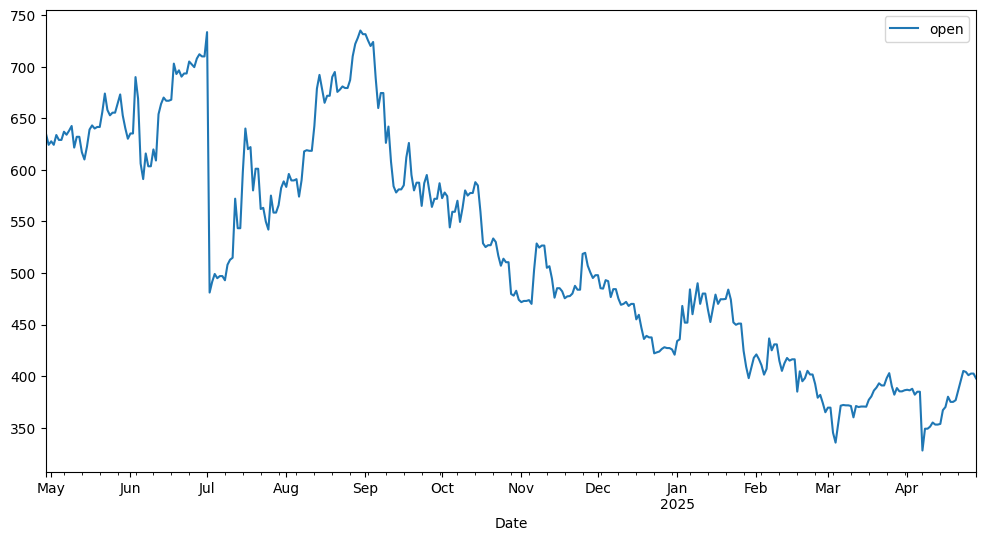

In [3]:
data.plot(figsize=(12, 6))

In [6]:
test_per = 35

train_data = data[:-int(len(data) * test_per/100)]

In [7]:
test_data =     data[-int(len(data) * test_per/100):]

### Auto regression model AR model

In [28]:
lags = 60
model = AutoReg(train_data,lags=lags) # AutoRegressive model past lags values
model_fit = model.fit()

In [29]:
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)

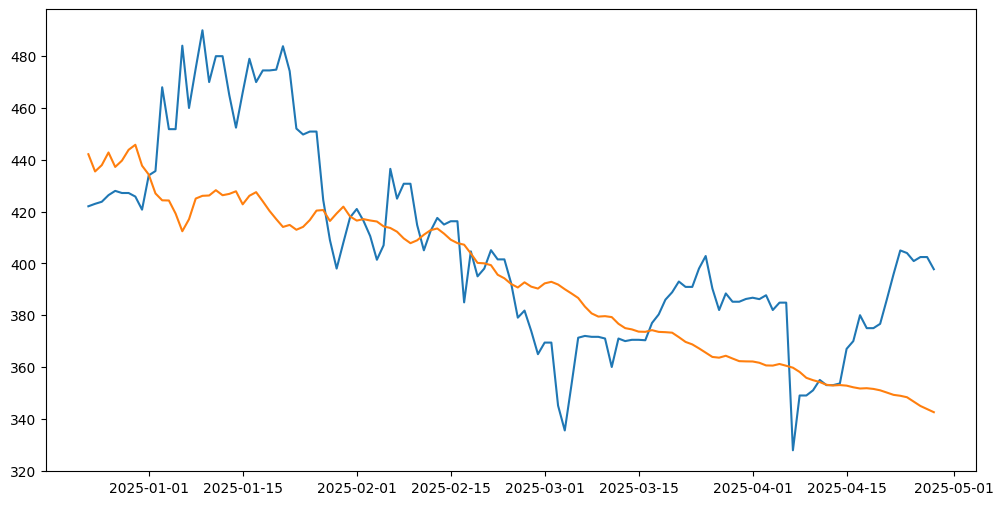

In [30]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')

In [31]:
mean_squared_error(test_data, predictions)

855.7526351733703

In [12]:
np.sqrt(mean_squared_error(test_data, predictions))

np.float64(29.25324999334895)

In [17]:
median_absolute_error(test_data, predictions)

np.float64(21.108711289542384)

In [15]:
mean_absolute_percentage_error(test_data, predictions) *100

5.501994845180059

### Moving average MV model (0,0,q)

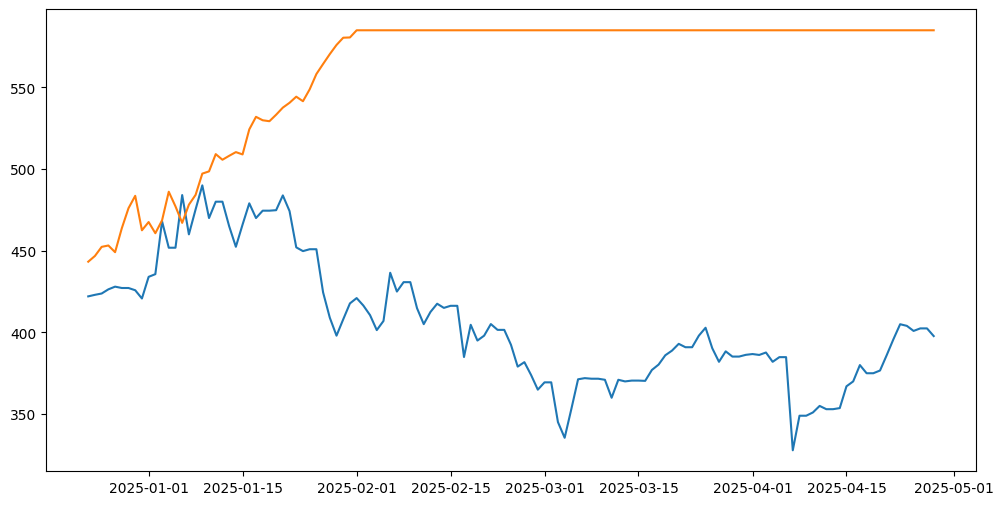

In [22]:
q = 40 # Error term taking into account
model = ARIMA(train_data, order=(0,0,q))
model_fit = model.fit()
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')


In [23]:
mean_squared_error(test_data, predictions)

29210.611275647192

In [24]:
mean_absolute_percentage_error(test_data, predictions) *100

39.832925811267344

### ARMA model autoregression moving average model

In [32]:
### ARMA model 
p = 60 # Error term taking into account
model = ARIMA(train_data, order=(p,0,0))
model_fit = model.fit()
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) +len(test_data)-1,
    dynamic=False
)

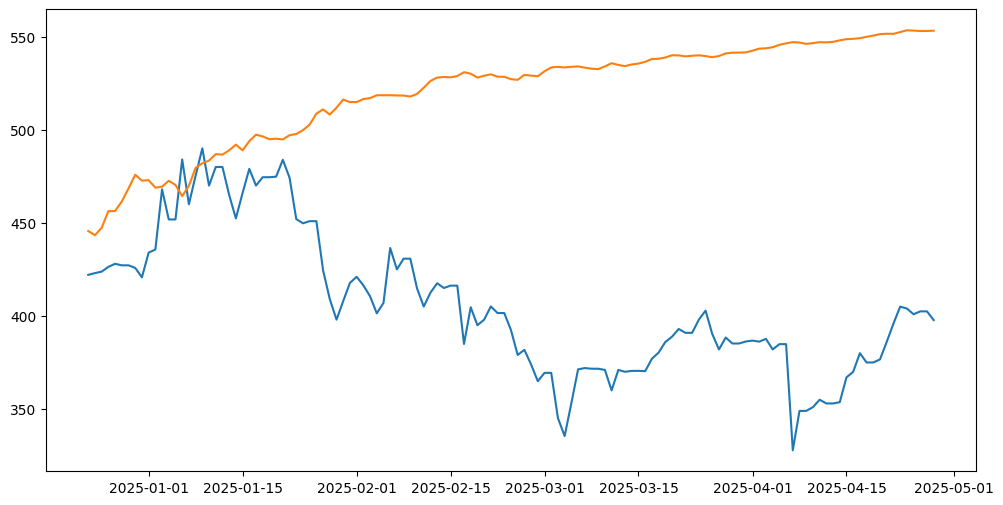

In [33]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Test-data')
plt.plot(test_data.index,predictions,label='predictions')